In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    width, height = Image.open(Im).size
    return (width,height)

In [3]:
def get_xy(Im):
    """Take an image and return all possible x,y coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))

In [4]:
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb

In [5]:
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [6]:
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [32]:
def inspect(Im,cluster,background = (0,0,0)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im 

In [8]:
def recolor(Im,cluster,color):   
    im = Image.open(Im) 
    pix = im.load()
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = color
    return im

In [52]:
def new_recolor(Im,cluster,color):   
    ind = df.loc[df['Cluster'] == cluster,['x','y']]
    c = np.asarray(inspect(Im,cluster))
    d = np.copy(c)
    for i,j in zip(list(ind['x']),list(ind['y'])):
        d[j,i] = color
    return d

In [42]:
ind = df.loc[df['Cluster'] == 1,['x','y']]

In [43]:
ind

,x,y
0,0,0
1,0,1
2,0,45
3,0,46
4,0,47
...,...,...
562495,705,228
562496,704,227
562497,704,228
562498,704,229


In [46]:
c = np.asarray(inspect('RED.png',1))

In [47]:
c

array([[[176,  26,   6, 255],
        [178,  25,   7, 255],
        [175,  23,   6, 255],
        ...,
        [154,  36,   7, 255],
        [151,  42,  11, 255],
        [148,  46,  13, 255]],

       [[178,  27,   7, 255],
        [179,  27,   8, 255],
        [177,  25,   8, 255],
        ...,
        [155,  37,   8, 255],
        [151,  42,  11, 255],
        [148,  46,  13, 255]],

       [[180,  29,   9, 255],
        [181,  29,  10, 255],
        [179,  27,  10, 255],
        ...,
        [156,  38,   9, 255],
        [152,  43,  11, 255],
        [149,  47,  12, 255]],

       ...,

       [[182,   3,   1, 255],
        [182,   3,   1, 255],
        [183,   2,   1, 255],
        ...,
        [173,  32,   5, 255],
        [173,  33,   5, 255],
        [169,  31,   3, 255]],

       [[183,   3,   1, 255],
        [182,   3,   1, 255],
        [183,   2,   2, 255],
        ...,
        [174,  33,   6, 255],
        [172,  33,   4, 255],
        [169,  30,   2, 255]],

       [[184

In [49]:
d = np.copy(c)

In [50]:
d

array([[[176,  26,   6, 255],
        [178,  25,   7, 255],
        [175,  23,   6, 255],
        ...,
        [154,  36,   7, 255],
        [151,  42,  11, 255],
        [148,  46,  13, 255]],

       [[178,  27,   7, 255],
        [179,  27,   8, 255],
        [177,  25,   8, 255],
        ...,
        [155,  37,   8, 255],
        [151,  42,  11, 255],
        [148,  46,  13, 255]],

       [[180,  29,   9, 255],
        [181,  29,  10, 255],
        [179,  27,  10, 255],
        ...,
        [156,  38,   9, 255],
        [152,  43,  11, 255],
        [149,  47,  12, 255]],

       ...,

       [[182,   3,   1, 255],
        [182,   3,   1, 255],
        [183,   2,   1, 255],
        ...,
        [173,  32,   5, 255],
        [173,  33,   5, 255],
        [169,  31,   3, 255]],

       [[183,   3,   1, 255],
        [182,   3,   1, 255],
        [183,   2,   2, 255],
        ...,
        [174,  33,   6, 255],
        [172,  33,   4, 255],
        [169,  30,   2, 255]],

       [[184

In [51]:
for i,j in zip(list(ind['x']),list(ind['y'])):
    d[j,i] = (215, 35, 35)

ValueError: could not broadcast input array from shape (3,) into shape (4,)

In [9]:
df = get_data('RED.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [10]:
im = Image.open('RED.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('RedS.png')

In [16]:
df = get_data('RedS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df), method = 'average')

In [35]:
df

,x,y,R,G,B,Cluster
0,0,0,180,28,4,1
1,0,1,180,28,4,1
2,0,45,180,28,4,1
3,0,46,180,28,4,1
4,0,47,180,28,4,1
...,...,...,...,...,...,...
562495,705,228,212,68,44,1
562496,704,227,196,52,28,1
562497,704,228,228,76,52,1
562498,704,229,228,76,52,1


In [17]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 6,criterion = 'maxclust', method = 'average')
dfo = get_data('RedS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [18]:
df['Cluster'].value_counts()

Cluster
1    174195
5    130452
4    128052
2     97402
6     26912
3      5487
Name: count, dtype: int64

In [19]:
clusts = list(set(df['Cluster'].values))
cluster = [inspect(i) for i in clusts]

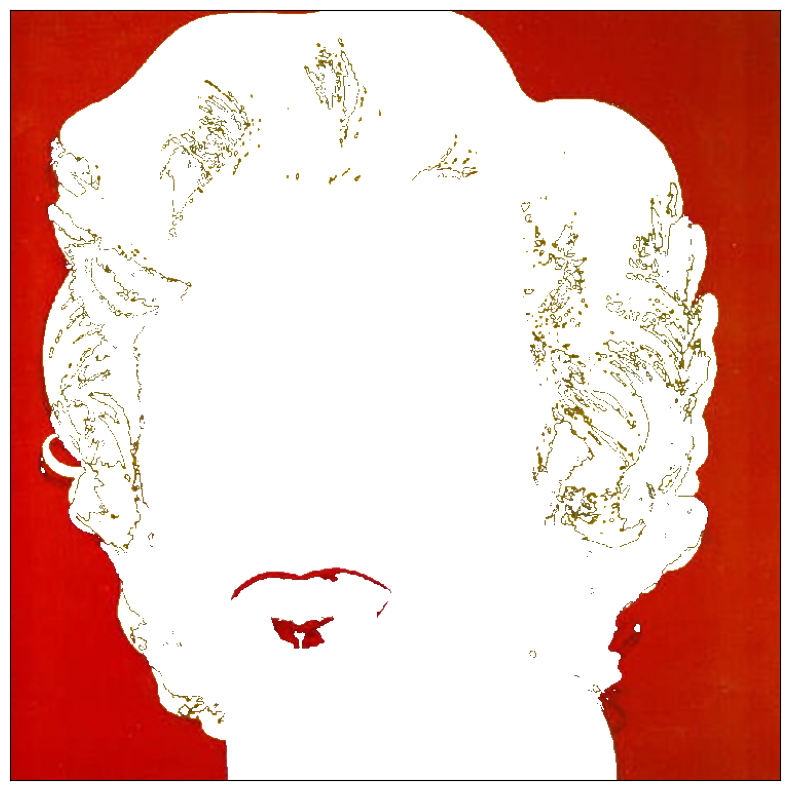

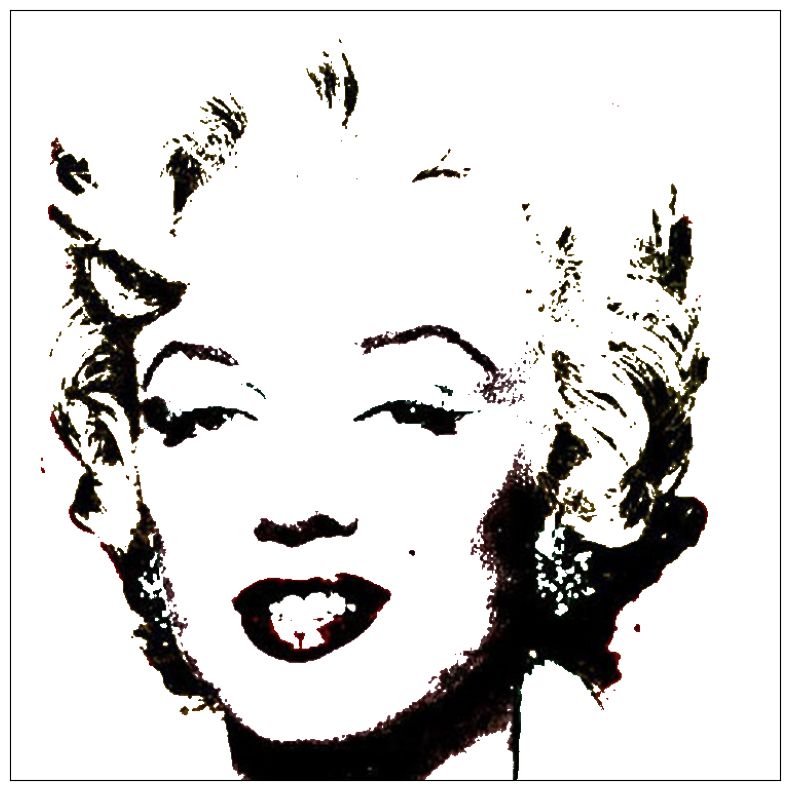

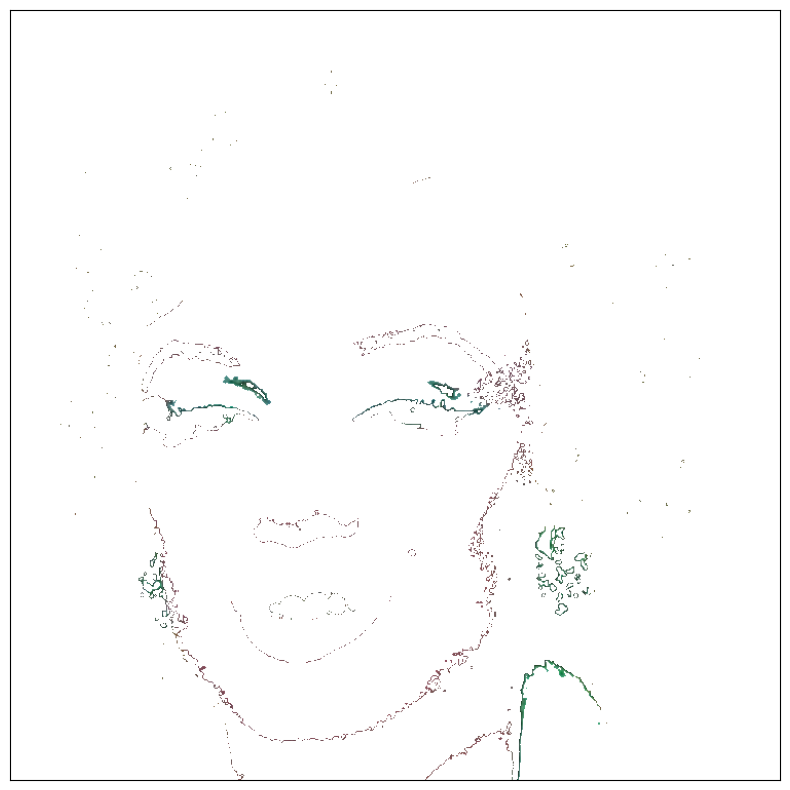

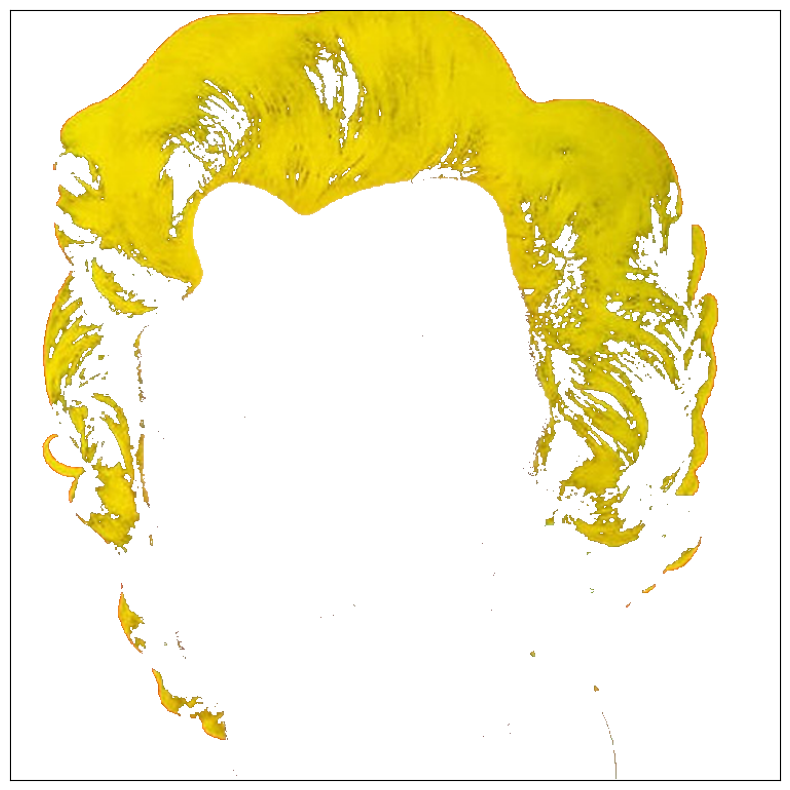

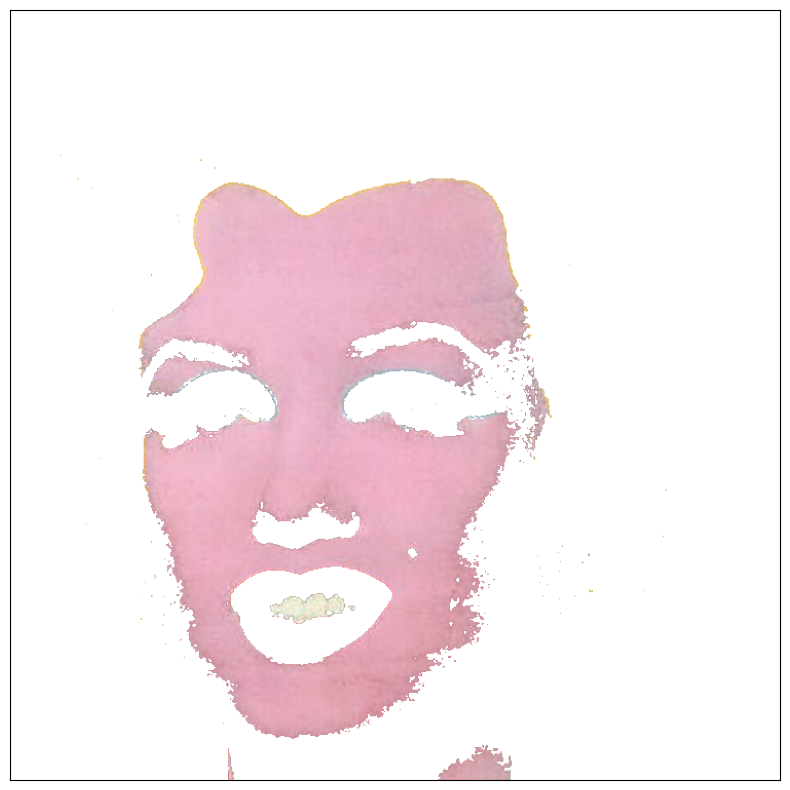

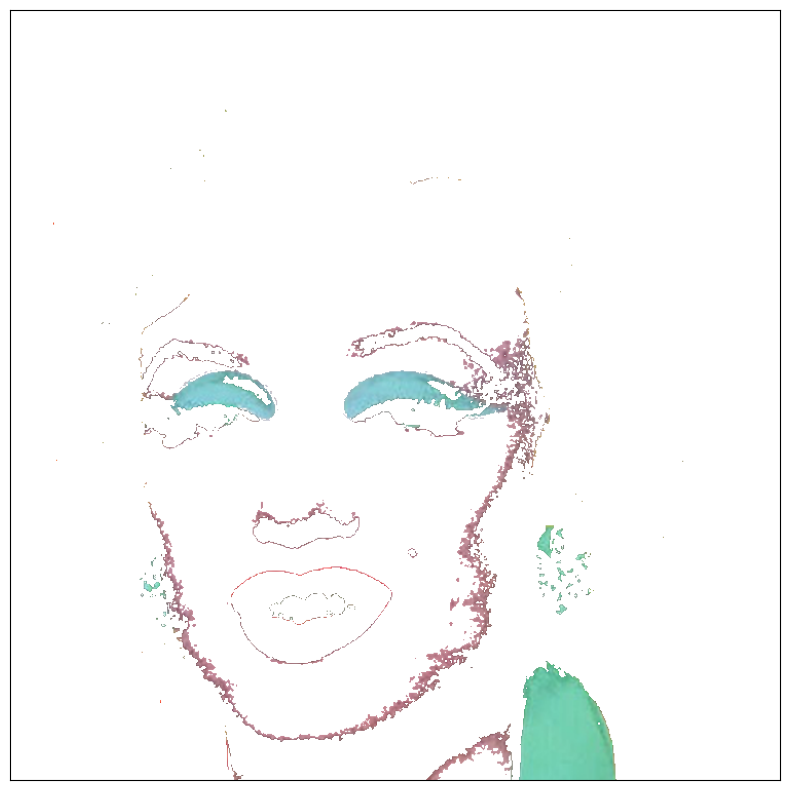

In [20]:
for i in clusts:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(np.asarray(inspect(i)))

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])

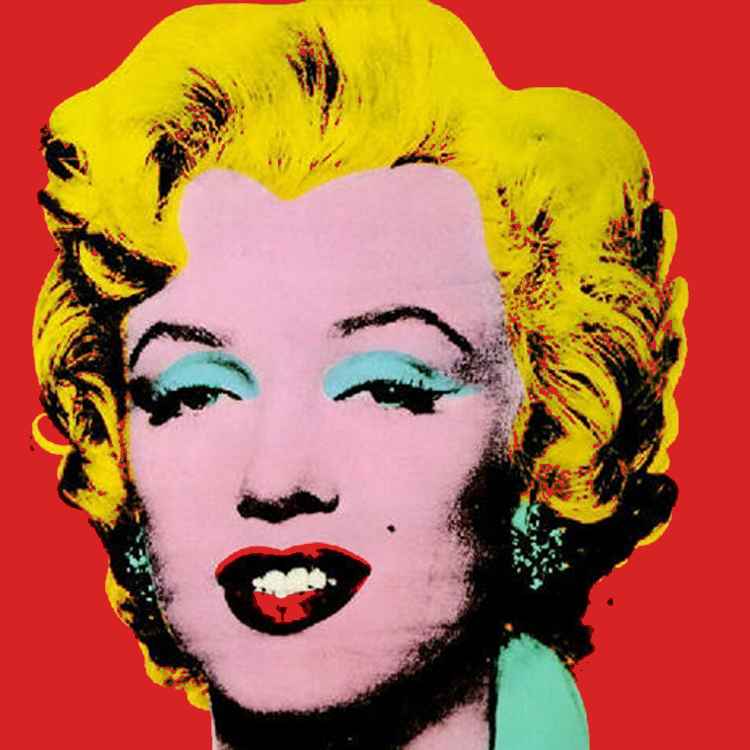

In [27]:
recolor('RED.png', 1, (215, 35, 35))

In [53]:
new_recolor('RED.png', 1, (215, 35, 35))

ValueError: could not broadcast input array from shape (3,) into shape (4,)